In [1]:
# %%bash
# mkdir -p ~/.kaggle/
# mv kaggle.json ~/.kaggle/
# kaggle datasets download --unzip -d wordsforthewise/lending-club

## 📚 Importing libraries and loading data

In [2]:
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
class EDA_Loan:

    def __init__(self):
        self.df = pd.read_csv('./accepted_2007_to_2018q4.csv/accepted_2007_to_2018Q4.csv').sample(frac=0.20)
        # df.head()
        
        print("Size: ", self.df.shape)
        self.description = self.df.describe().T
        sns.set(rc={'figure.figsize':(26,10)})

In [4]:
lc_data = EDA_Loan()
df = lc_data.df

Size:  (452140, 151)


### Structure of the notebook:

    0. Category of analysis
    1. Question/hypothesis
    2. Visualization of the parameters
    3. Conclusion
    4. Key takeaway based on multiple visualisations and conclusion

 ## 📊 Graphical Analysis

<AxesSubplot:>

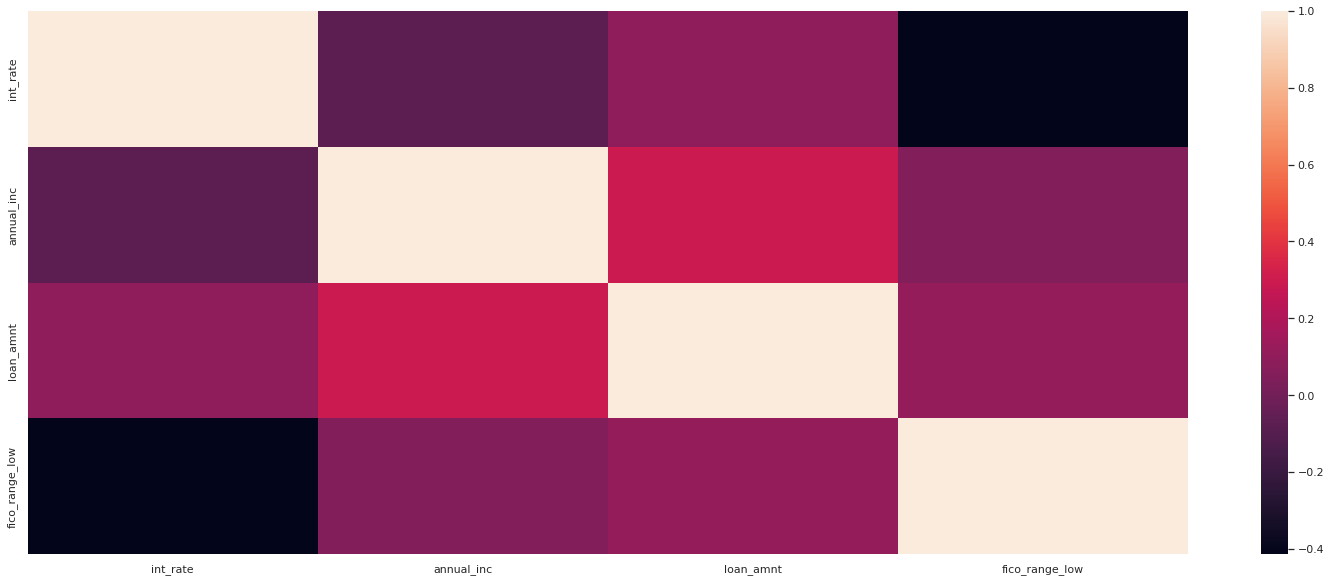

In [5]:
sns.heatmap(df[["int_rate","annual_inc","loan_amnt","fico_range_low"]].corr())

 ## 🔑 takeaways

 - ##### Interest Rate and Fico range have strong negative correlation
 -  ##### Annual Income and Loan Amount have strong positive correlation
 - ##### Fico Range and Annual Income have a very slight positive correlation

 ## Grade

#### Analyzing different parameters such as count, interest rate and a few other factors with respect to grade to see which ones affect the grade of loan being offered and how they affect it.

 #### Finding out how many loans of each type are offered.

<AxesSubplot:xlabel='grade', ylabel='count'>

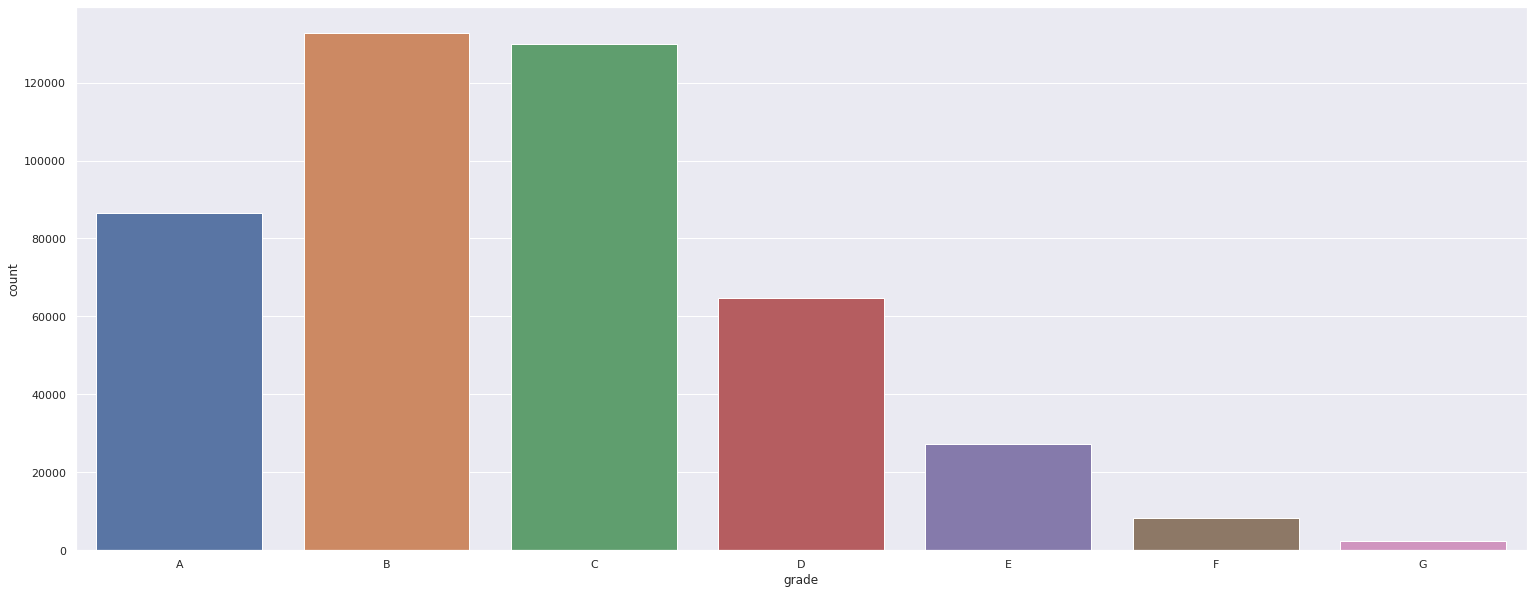

In [6]:
sns.countplot(x="grade", data=df, order=list("ABCDEFG"))

- **Grade B and C loans are offered in high numbers whereas all the other grade loans are offered in significantly lower numbers. The total number of B and C loans offered is more than the sum of all the other loans offered**

 #### What is the nature of relationship between interest rate and the grade of loans being offered?

<AxesSubplot:xlabel='grade', ylabel='int_rate'>

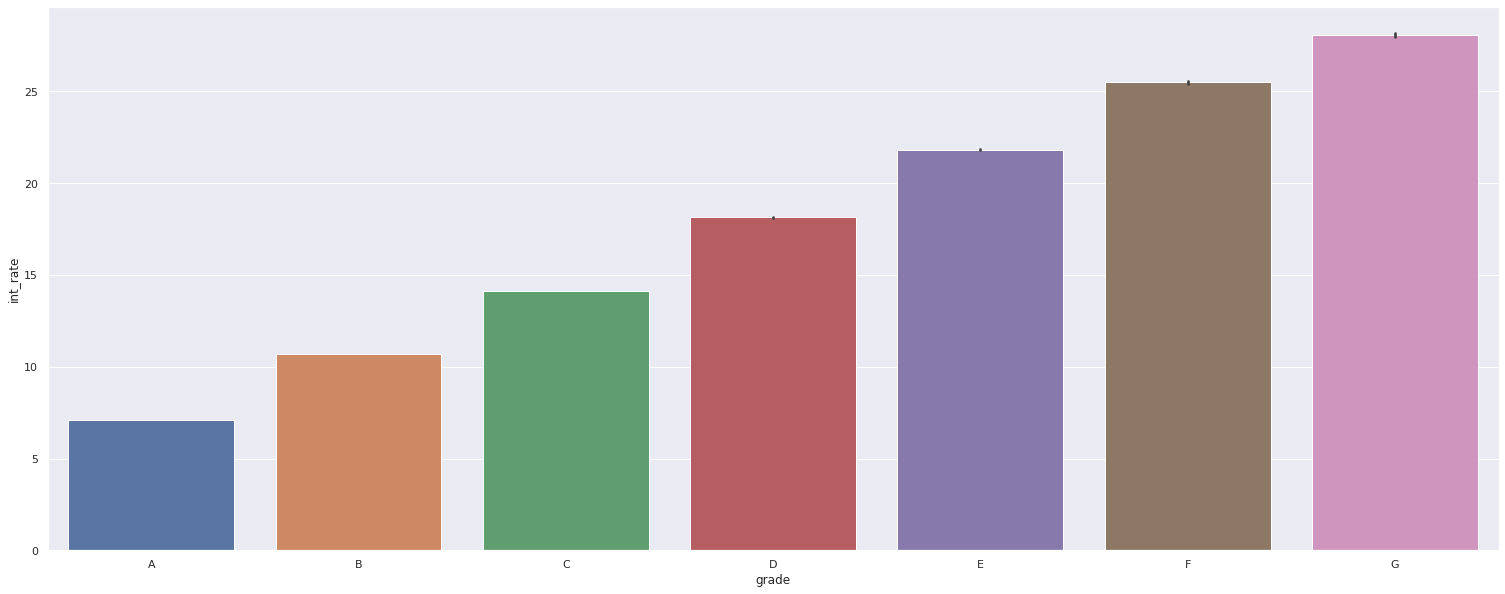

In [7]:
sns.barplot(y="int_rate", x="grade", data=df, order=list("ABCDEFG"))

- **The Grade of loan offered and interest rates exhibit a direct linear reationship, the increase of Grade G loans have the highest rates of Interest and is probably why very few Grade G loans are offered but does not clearly explain why grade B and C loans are offered more than Grade A**

 ####  What is the relationship between Fico Score (lower bound) and Grade of loans?

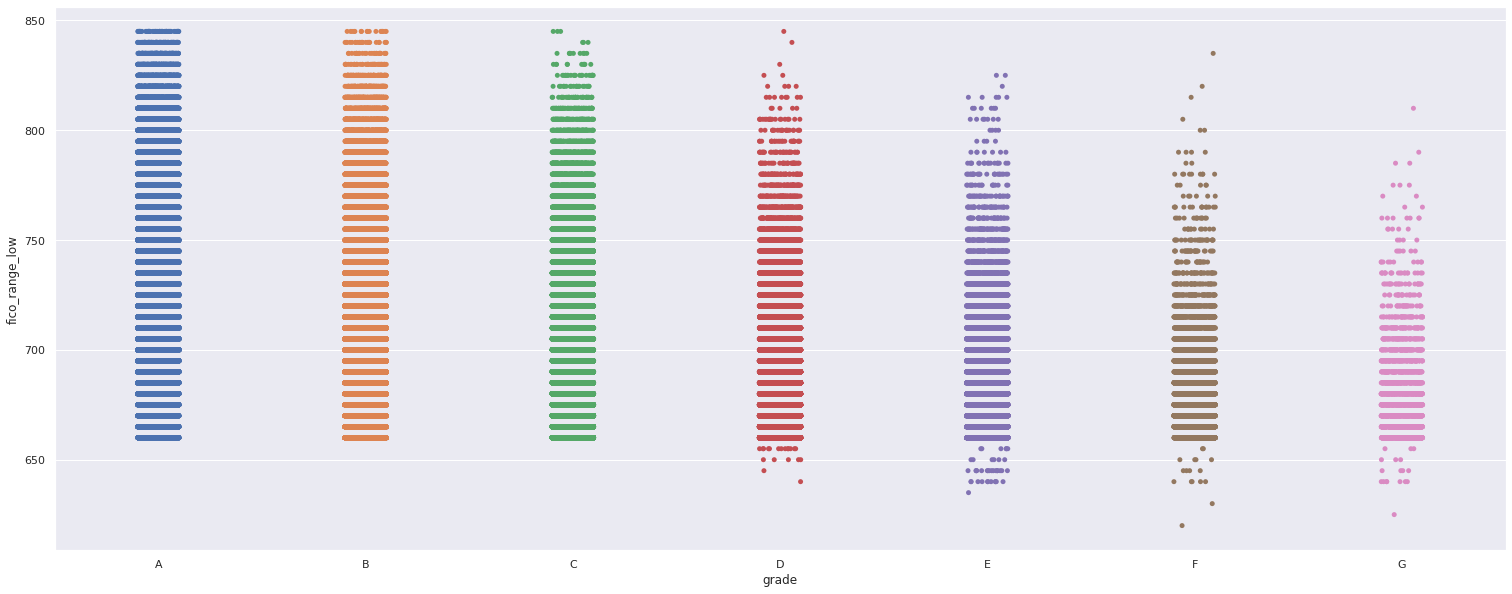

In [8]:
ax = sns.stripplot(y="fico_range_low", x="grade", data=df, order=list("ABCDEFG"))

#### Grade wise summary statistic for fico range low

In [9]:
df[["grade","fico_range_low"]].groupby("grade").describe()

fico_range_low                                                          
               count        mean        std    min    25%    50%    75%    max
grade                                                                         
A            86501.0  728.921226  37.075039  660.0  700.0  725.0  755.0  845.0
B           132824.0  699.778090  31.165475  660.0  675.0  695.0  715.0  845.0
C           129970.0  689.375933  25.088128  660.0  670.0  685.0  705.0  845.0
D            64622.0  683.931865  21.731324  640.0  665.0  680.0  695.0  845.0
E            27365.0  682.558560  20.946388  635.0  665.0  680.0  695.0  825.0
F             8395.0  680.532460  20.030564  620.0  665.0  675.0  690.0  835.0
G             2455.0  679.325866  20.252173  625.0  665.0  675.0  690.0  810.0

- **The Fico Score (lower bound) of borrowers with Grade D-G loans do not have a vast difference and as shown by the maximum scores, there is no definite relationship between Fico Score and Grade of loans**

 #### What is the relationship between Annual Income and Grade of loans?

<AxesSubplot:xlabel='grade', ylabel='annual_inc'>

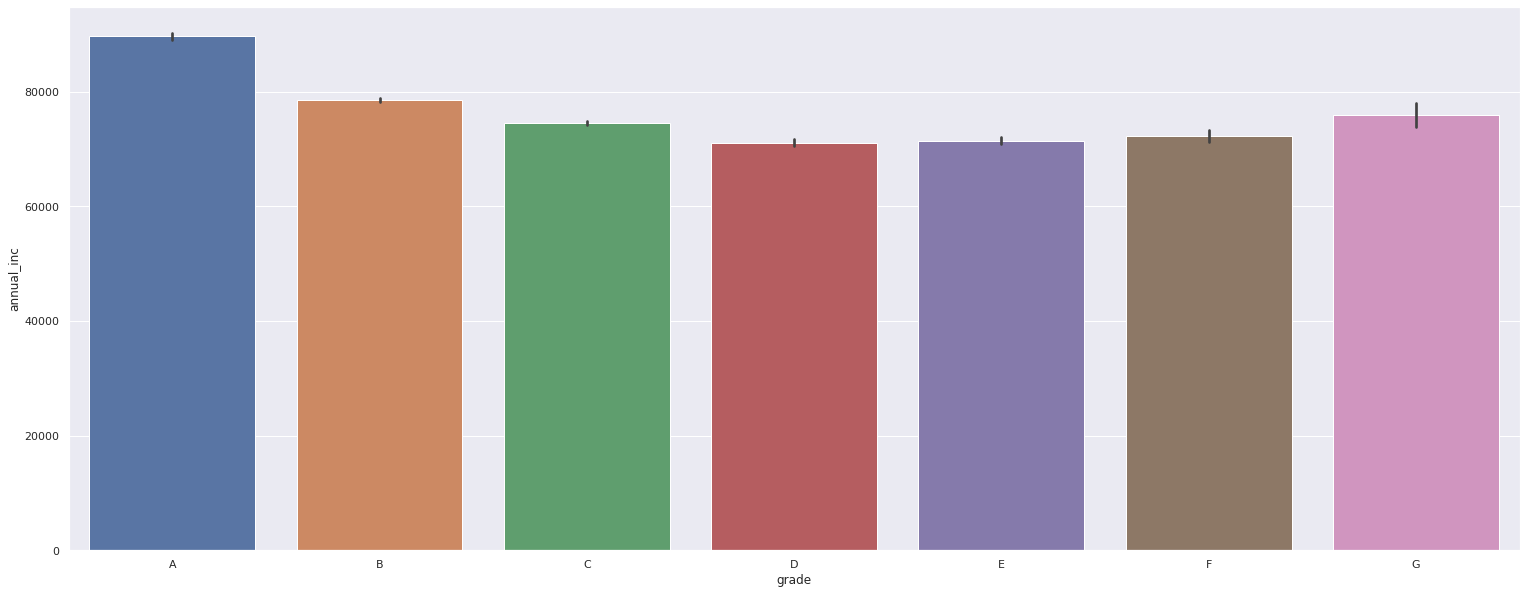

In [10]:
sns.barplot(y="annual_inc", x="grade", data=df, order=list("ABCDEFG"))

In [11]:
df[["grade","annual_inc"]].groupby("grade").describe()

annual_inc                                                               \
           count          mean           std  min      25%      50%       75%   
grade                                                                           
A        86501.0  89644.781108  92179.050640  0.0  52500.0  75000.0  105000.0   
B       132824.0  78541.541376  69965.214050  0.0  47083.6  65000.0   94500.0   
C       129970.0  74528.397789  75686.512121  0.0  45000.0  63000.0   90000.0   
D        64622.0  71092.979027  76684.381824  0.0  42500.0  60000.0   85000.0   
E        27365.0  71457.081303  51806.539657  0.0  44000.0  60000.0   85000.0   
F         8395.0  72249.424985  47516.716911  0.0  45000.0  62700.0   86000.0   
G         2455.0  75911.258660  51164.551617  0.0  46040.0  65000.0   90000.0   

                   
              max  
grade              
A       9500000.0  
B       8500021.0  
C       9930475.0  
D      10999200.0  
E       3600000.0  
F       1440000.0  
G        900000.0

- **The Income alone of a person doesn't directly reflect the grade of loan and does not establish a clear pattern since the Annual Income of borrowers with Grade A loans is much higher than Grade B and C, and the mean of Annual Income of borrowers with Grade G loans is slightly higher than Grades C-F**

#### What is the relationship between the Loan amount and Grade of loans?

<AxesSubplot:xlabel='grade', ylabel='loan_amnt'>

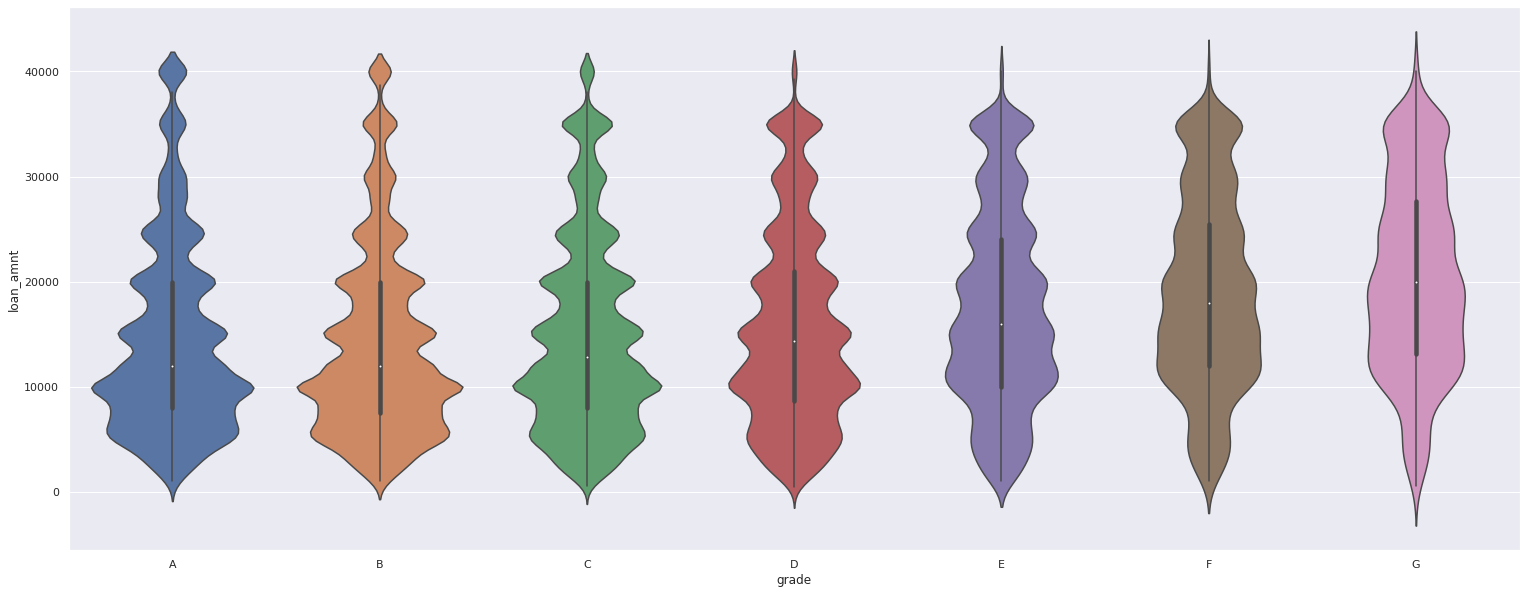

In [12]:
sns.violinplot(y="loan_amnt", x="grade", data=df, order=list("ABCDEFG"))

- **The Loan Amount and the Grade of loan have a fairly linear relationship with an exception of Grade B loans, which are slightly lower than Grade A loans**

 ## 🔑 takeaways

 - **Loan amount and interest rates have a similar effect on the Grade of loan**
 - **There is no direct effect of Fico Score and Annual Income on the number of loans being offered for each Grade**

 ## States

#### Understanding which States have more number of loans and what might be the probable reasons

#### Finding out the number of loans in each State

<AxesSubplot:xlabel='addr_state', ylabel='count'>

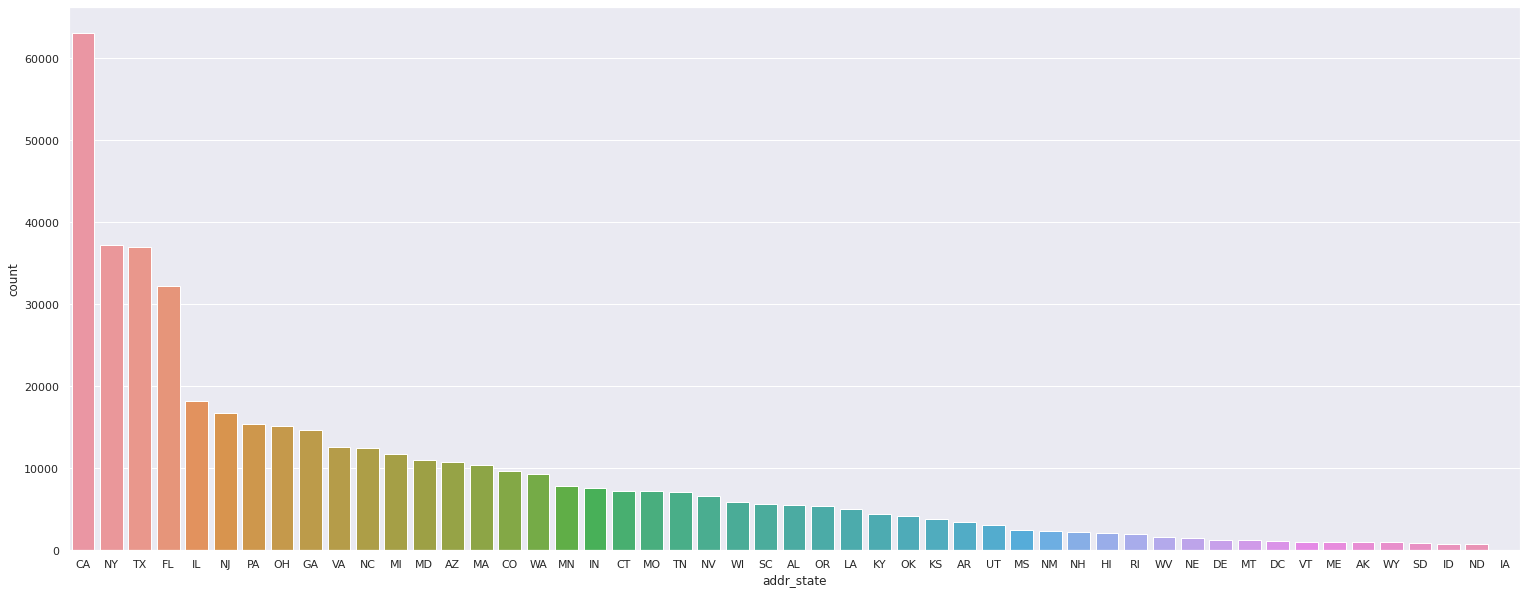

In [13]:
sns.countplot(x="addr_state", data=df, order=df["addr_state"].value_counts().index)

- **California residents have maximum number of loans which are significantly higher than any other state. Texas and New York have an almost equal number of loans and the other states have significantly lesser number of loans**

 #### Finding the relationship between Loan Amount and the State in which the borrowers reside.

<AxesSubplot:xlabel='addr_state', ylabel='loan_amnt'>

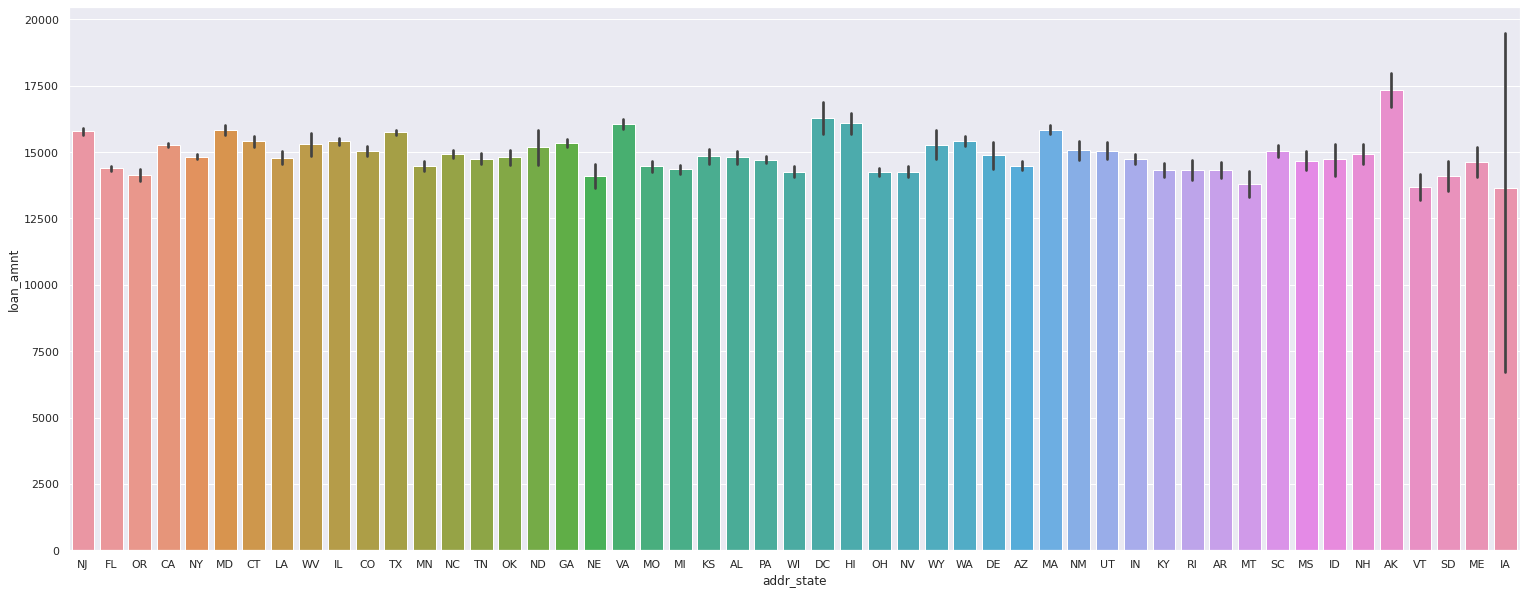

In [14]:
sns.barplot(y="loan_amnt", x="addr_state", data=df)

In [15]:
temp=df[["loan_amnt","addr_state"]].groupby("addr_state").describe()
temp["loan_amnt"]["mean"].sort_values().iloc[[0,-1]]

addr_state
IA    13641.666667
AK    17323.437500
Name: mean, dtype: float64

- **The difference between highest and lowest mean of Loan Amounts of residents in the states is 3223 which shows that there isn't a significant difference between the loan amounts**

 #### What is the relationship between Fico Score and the States?

<AxesSubplot:xlabel='addr_state', ylabel='fico_range_low'>

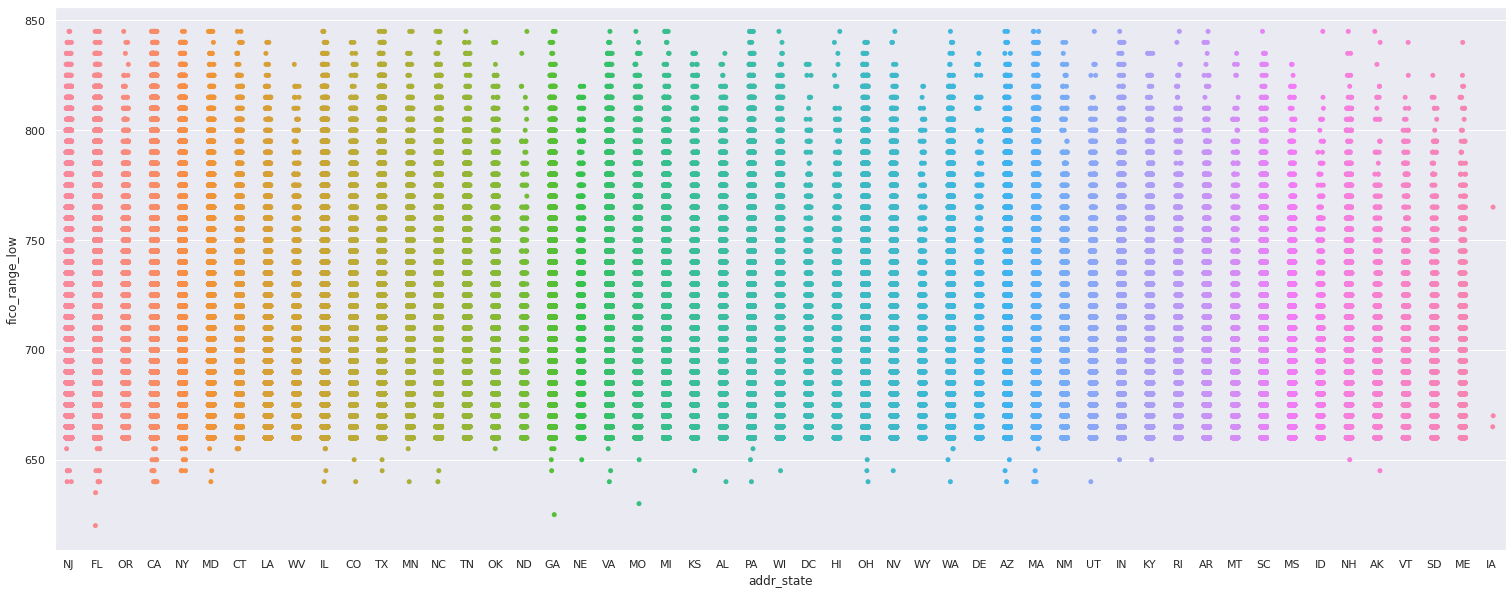

In [16]:
sns.stripplot(y="fico_range_low", x="addr_state", data=df)

In [17]:
temp=df[["fico_range_low","addr_state"]].groupby("addr_state").describe()
temp["fico_range_low"]["mean"].sort_values().iloc[[0,-1]]

addr_state
HI    695.930341
WV    701.466867
Name: mean, dtype: float64

- **All the states have similar Fico Scores with very little variation while offering loans and Fico Score alone does not appear to be a deciding factor**

 #### What is the relationship between the Annual Income and the State of residence?

<AxesSubplot:xlabel='addr_state', ylabel='annual_inc'>

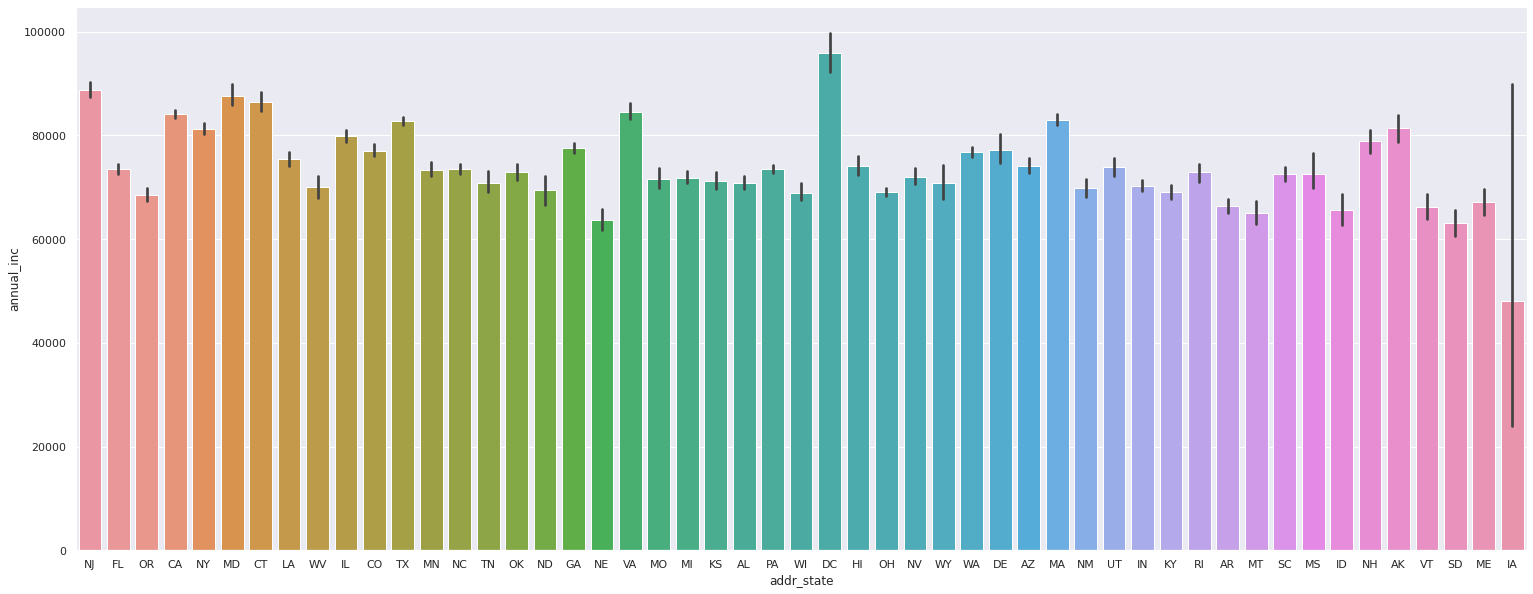

In [18]:
sns.barplot(y="annual_inc", x="addr_state", data=df)

In [19]:
temp=df[["annual_inc","addr_state"]].groupby("addr_state").describe()
temp["annual_inc"]["mean"].sort_values().iloc[[0,-1]]

addr_state
IA    48000.000000
DC    95810.968211
Name: mean, dtype: float64

- **The Income of South Dakota is the lowest and DC is the highest but the variation in incomes still does not explain why the number of loans taken in California is significantly higher than any other state**

 ## 🔑 takeaways

 - **The mean Fico Scores of residents of all the States have a very small difference**
 - **In the given dataset, there was no specific indication of the population in each state, which might be an important factor to consider in order to understand relationship of number of loans to State of residence**

 ## Purpose

 #### Finding out the relationship between purpose and numerical factors

<AxesSubplot:xlabel='purpose', ylabel='count'>

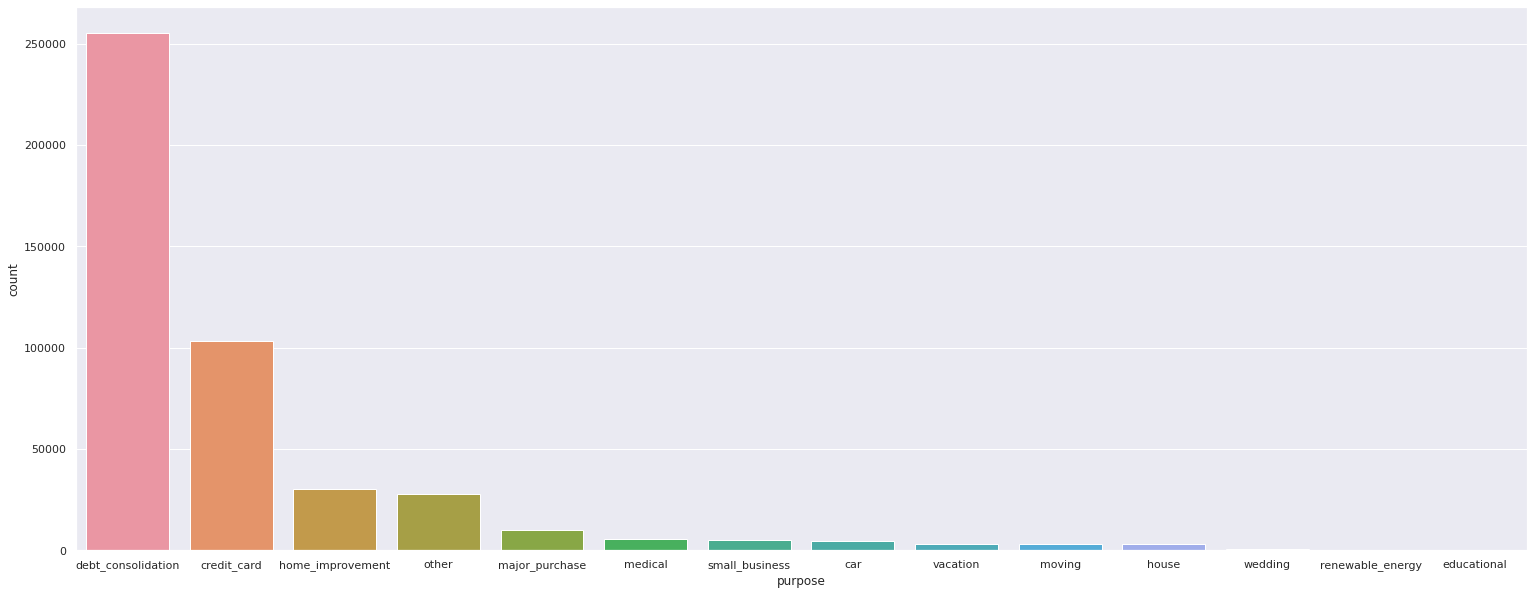

In [20]:
sns.countplot(x="purpose", data=df, order=df["purpose"].value_counts().index)

- **The maximum number of loans taken is for debt consolidation which is exponentially higher than any other category**

#### Understanding the impact of interest rate on the purpose of loans

<AxesSubplot:xlabel='purpose', ylabel='int_rate'>

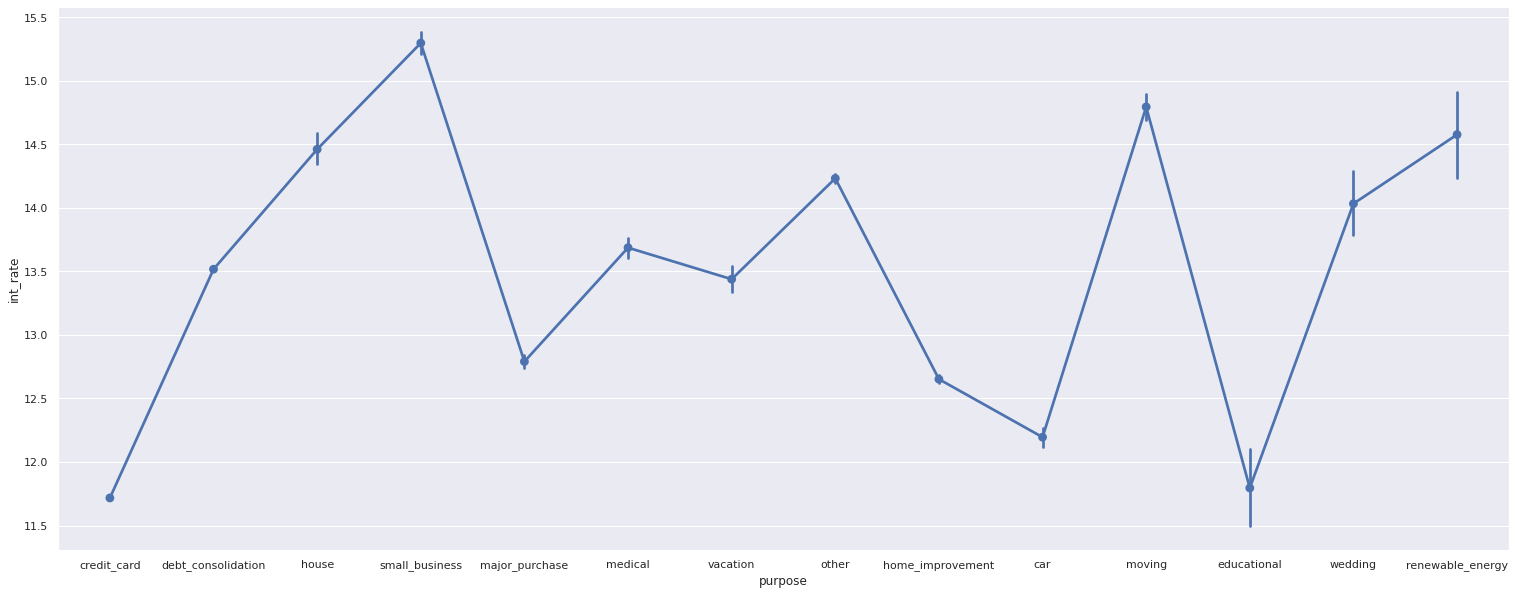

In [21]:
sns.pointplot(y="int_rate", x="purpose", ci = 75, data=df)

 - **Categories like credit cards have fixed interest rates whereas educational loans have varying interest rates**

In [22]:
temp=df[["int_rate","purpose"]].groupby("purpose").describe()
temp["int_rate"]["mean"].sort_values().iloc[[0,-1]]

purpose
credit_card       11.716894
small_business    15.297268
Name: mean, dtype: float64

 - **The Interest Rates of small businesses is the highest and car insurance is the lowest with a difference of 3.81%**

 #### Understanding the mean Annual Incomes of borrowers who get loans for different purposes

<AxesSubplot:xlabel='purpose', ylabel='annual_inc'>

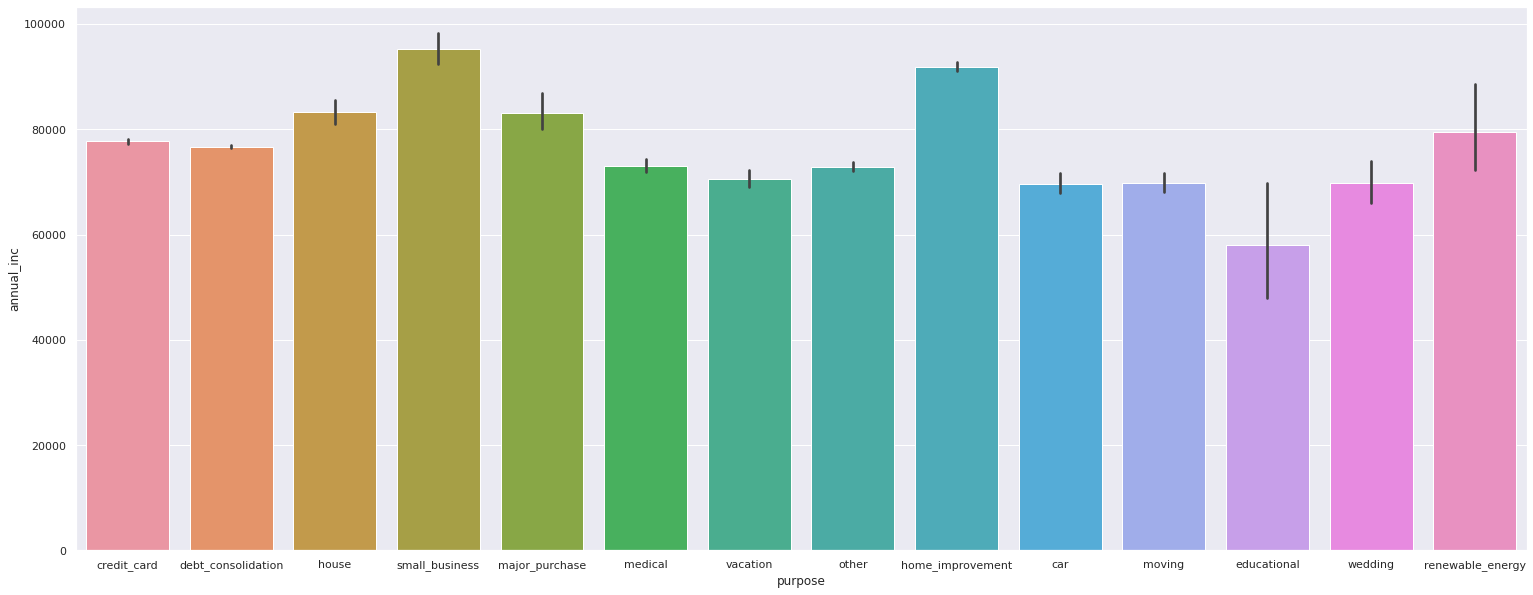

In [23]:
sns.barplot(y="annual_inc", x="purpose", data=df)

- **The annual income of borrowers with educational loans is the lowest and for small businesses is the highest**

<AxesSubplot:xlabel='purpose', ylabel='fico_range_low'>

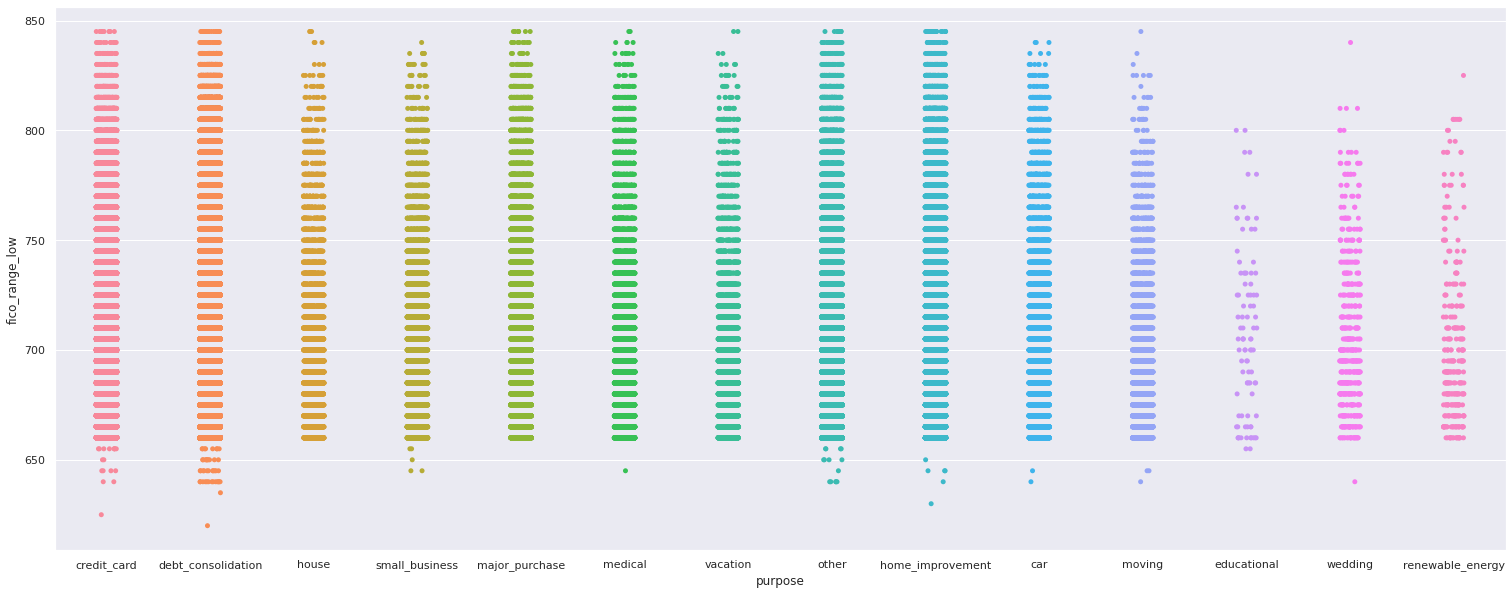

In [24]:
sns.stripplot(y="fico_range_low", x="purpose", data=df) 

 - **The fico scores of borrowers for different purposes do not have significantly varying scores**

 ## 🔑 takeaways
 - ##### There is an accepted fixed maximum and minimum credit scores for major purchases, credit card and debt consolidation
 - ##### The number of borrowers for debt consolidation is greater than the sum of all the borrowers of other categories

 ## Settlement

 #### Understanding how long borrowers take to repay loans and factors affecting them

<AxesSubplot:xlabel='settlement_term', ylabel='count'>

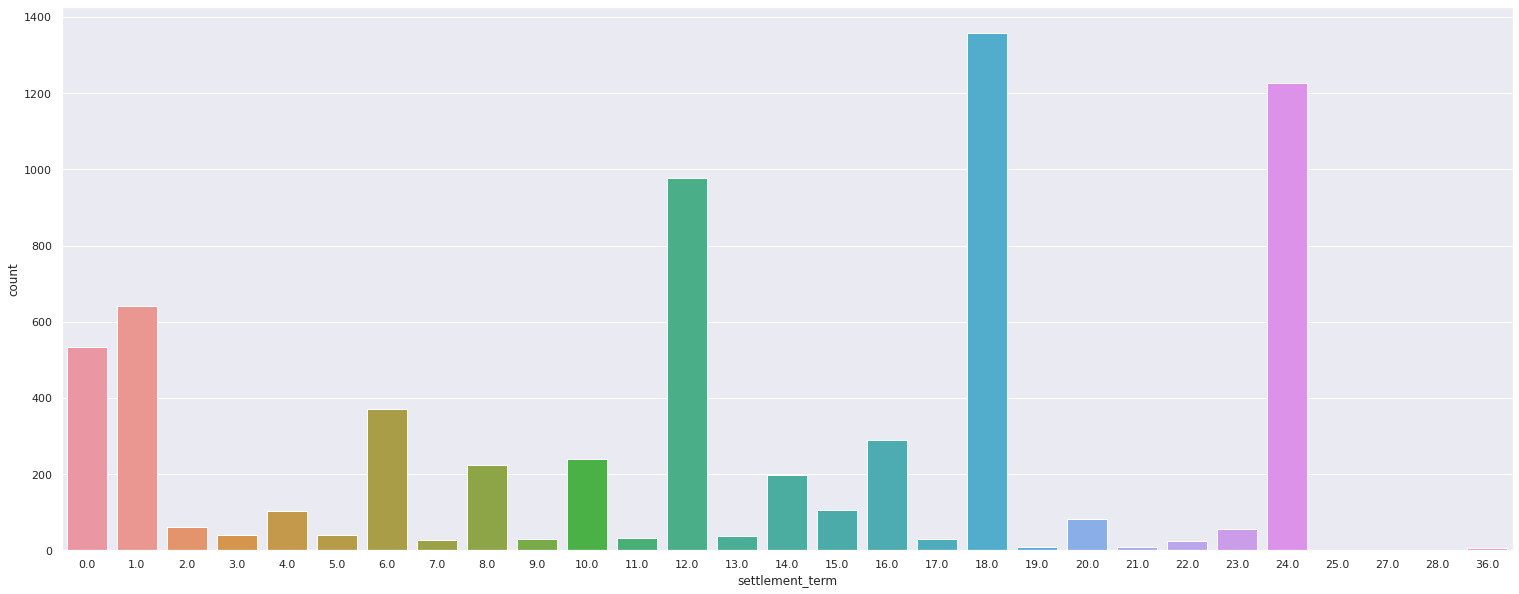

In [25]:
sns.countplot(x="settlement_term", data=df)

 - **The maximum number of borrowers repay loans in 18 months or 24 months**

<AxesSubplot:xlabel='settlement_term', ylabel='loan_amnt'>

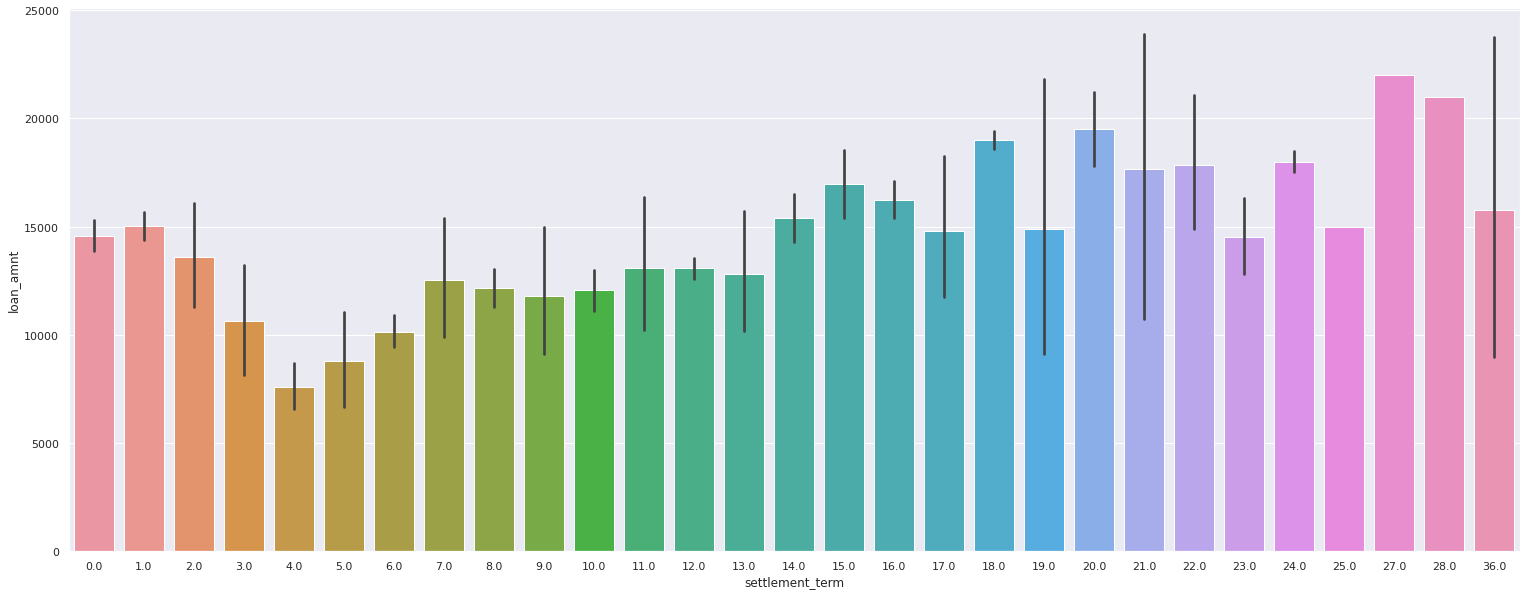

In [26]:
sns.barplot(y="loan_amnt", x="settlement_term", data=df)

- **The settlement term does not depend on the loan amount taken, since a loan amount of around \\$35000 has taken 30 months whereas a \\$32500 loan has taken 33 months**

<AxesSubplot:xlabel='settlement_term', ylabel='total_rec_late_fee'>

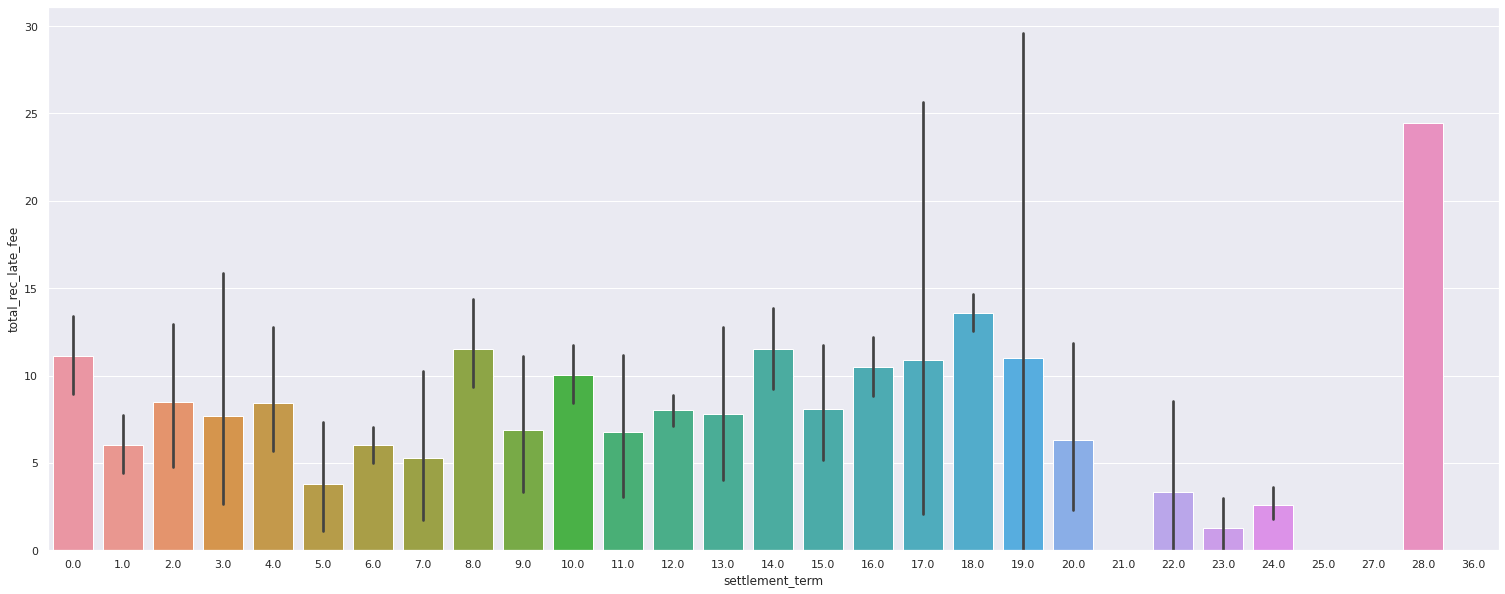

In [27]:
sns.barplot(data=df, y="total_rec_late_fee", x="settlement_term")

- **The late fee collected for settlements that took 36 months is the highest but the late fee for 20 months is significantly lower than 17 months**

 ####  Finding out how interest rate varies with settlement term

<AxesSubplot:xlabel='settlement_term', ylabel='int_rate'>

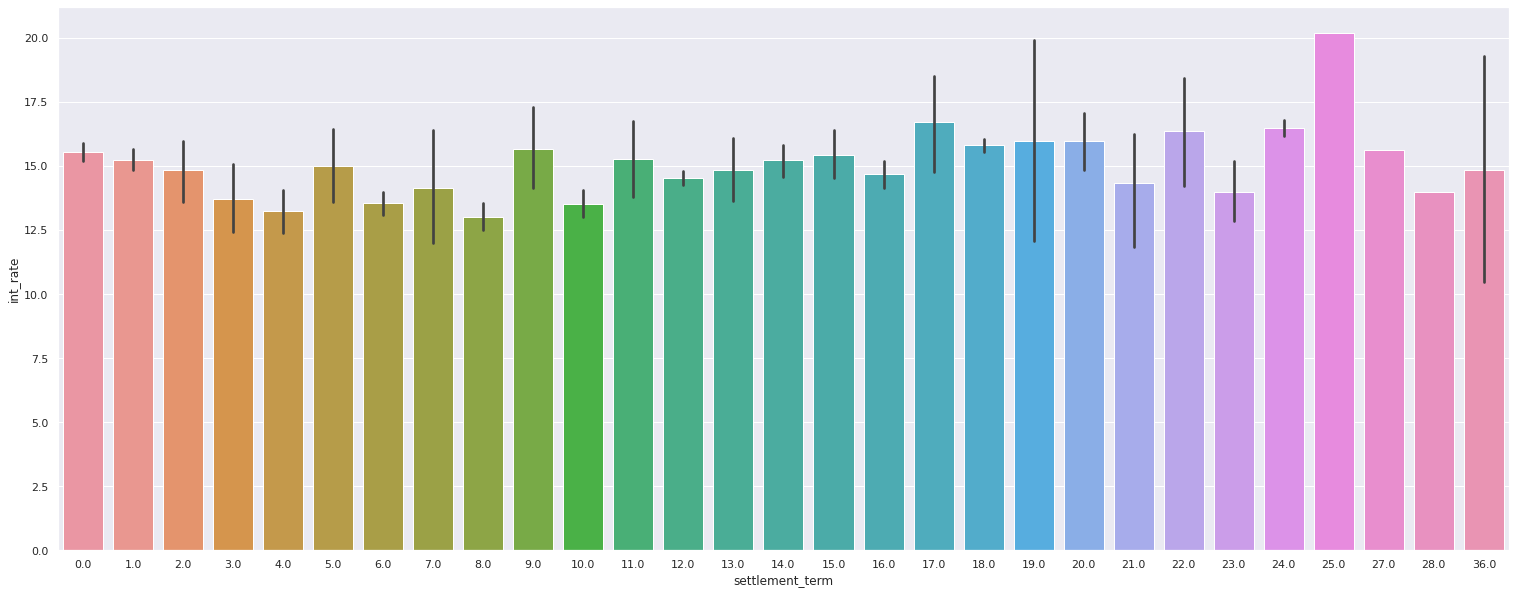

In [28]:
sns.barplot(data=df, y="int_rate", x="settlement_term")

- **The interest rate of 55 months is the lowest whereas the interest rate of a borrower whos settlement period is 36 months is higher**

In [29]:
temp=df[["int_rate","settlement_term"]].groupby("settlement_term").describe()
temp["int_rate"]["mean"].sort_values().iloc[[0,-1]]

settlement_term
8.0     13.005
25.0    20.200
Name: mean, dtype: float64

 - **The Interest Rates of 30 months is the highest and 50 is the lowest with a difference of around 8% points**

 ## Playing around with different columns

#### Finding out the types of applicants and how many in each category

In [30]:
df["application_type"].value_counts()

Individual    428070
Joint App      24062
Name: application_type, dtype: int64

- **There is a significantly higher number of individual borrowers than joint**

#### Understanding the percentage of borrowers in the two categories of loan terms

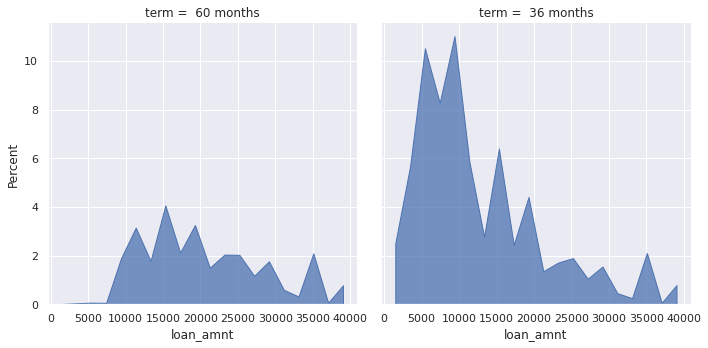

In [31]:
sns.displot(data=df, col="term", x="loan_amnt", kind="hist", bins=20, element="poly", stat="percent")

- **In the 36 months term borrowers, the highest percentage of borrowers have loans between \\$5000 to \\$10000 whereas the maximum percentage of the 60 months term borrowers have loans around \\$15000**

 ### Breaking down how many loans are taken in specific months and years

<AxesSubplot:xlabel='issue_m', ylabel='count'>

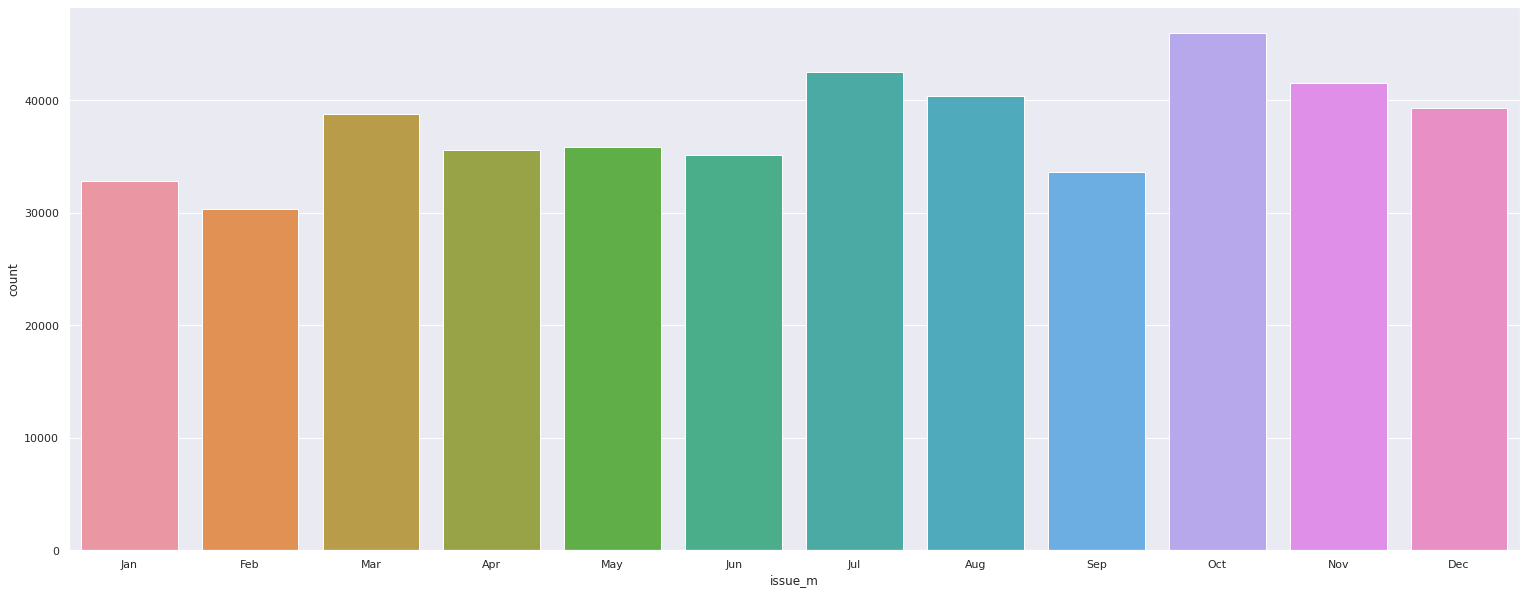

In [32]:
df["issue_m"]=df["issue_d"].apply(lambda x: str(x).split("-")[0])
sns.countplot(x=df["issue_m"], order="Jan;Feb;Mar;Apr;May;Jun;Jul;Aug;Sep;Oct;Nov;Dec".split(";"))

<AxesSubplot:xlabel='issue_d', ylabel='count'>

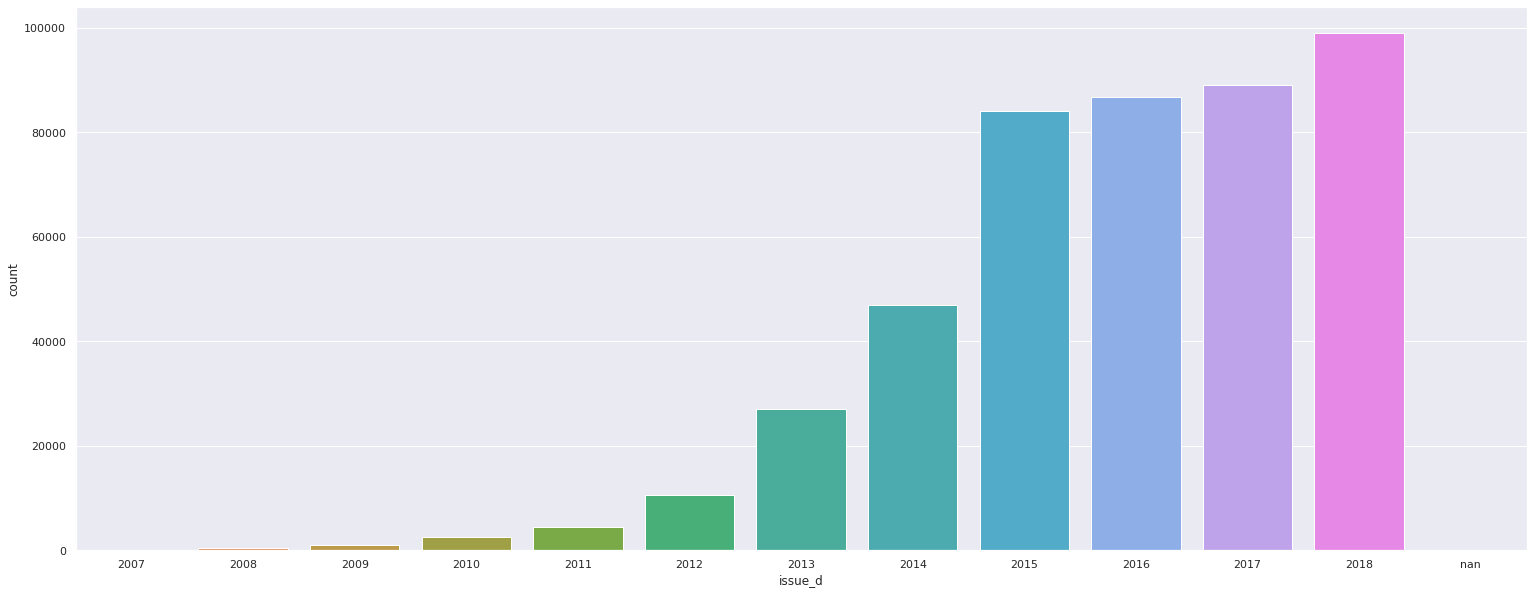

In [33]:
year=df["issue_d"].apply(lambda x: str(x).split("-")[-1])
sns.countplot(x=year, order=year.value_counts().index.sort_values())

- **The number of loans taken in 2017 was slower than the pattern established in earlier years but picked up in 2018 with a strong increase**

 ## 🔑 takeaways
 - **The percentage of borrowers in the 36 month period borrow in lower denominations compared to the 60 month period**
 - **There was a steady rise in the number of loans being offered in the years 2008-2018**
 - **Most loans are taken in October and least in February**

 ### ✨ Inspiration
 - https://www.kaggle.com/faressayah/lending-club-loan-defaulters-prediction/notebook
 - https://www.kaggle.com/wordsforthewise/lending-club
 - https://www.kaggle.com/namk134874/lending-club-data-exploration-and-modeling
 - https://seaborn.pydata.org/examples/index.html
 - https://resources.lendingclub.com/LCDataDictionary.xlsx